# A. Data preprocessing and Setup

### Question 1. Import libraries, read the csv file as a dataframe, then check info(), head() and column() of the data frame

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from bisect import bisect_left


In [288]:
df = pd.read_csv("C:\\Users\\Hi there\\Desktop\\Intro to CS\\Final Project\\Dataset\\Academic_performance.csv")

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [290]:
df.shape

(1000, 8)

In [291]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Check the dataframe if are there any missing values

<AxesSubplot:>

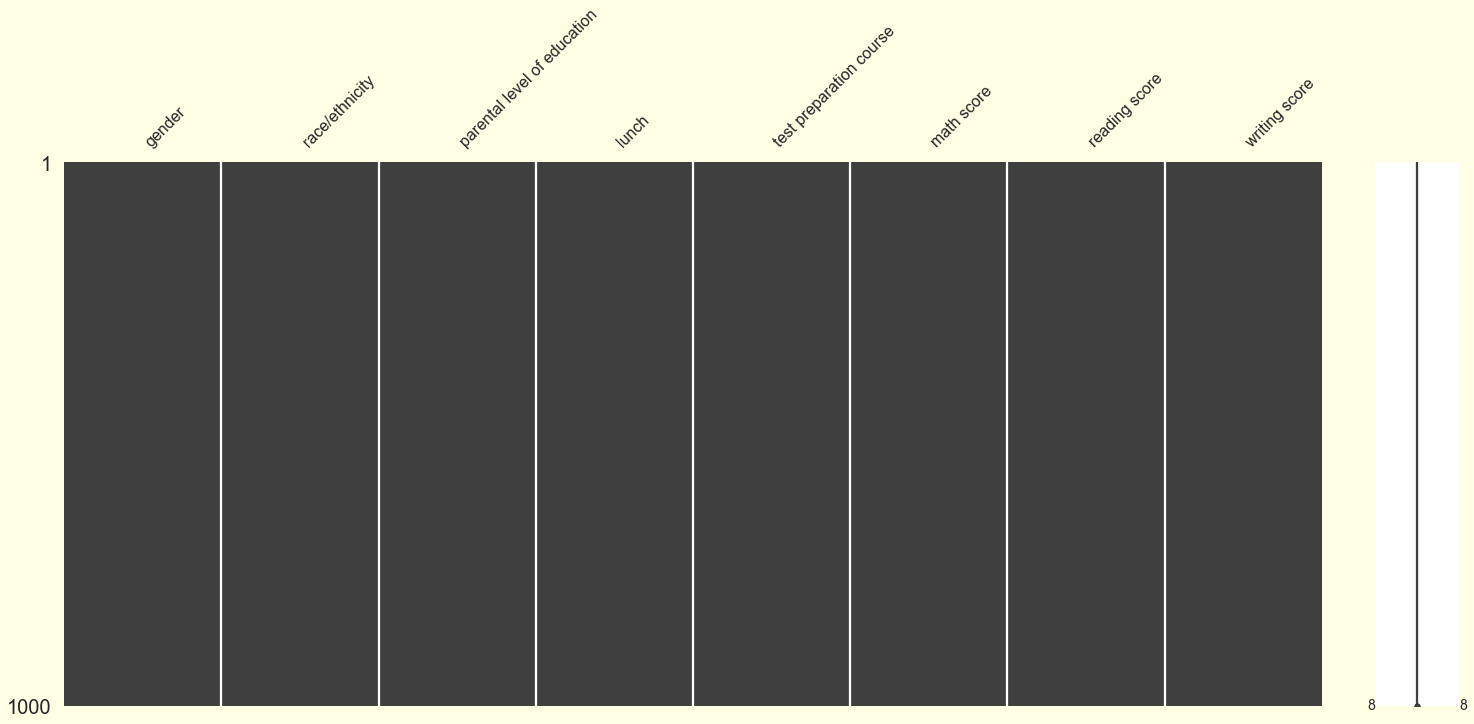

In [292]:
msno.matrix(df)

In [293]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# B. Grading System

### Question 2. Calculate mean of three subjects and add "mean" column to dataframe

In [294]:
df['mean'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [295]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


### Question 3. According to grading scale, add "grade" column into dataframe

| Scale of 100  | Grade | Qualification |
|---------------|-------|---------------|
| >=90 & <= 10  | A+    | Excellent     |
| >=85 & <= 89  | A     | Very Good     |
| >=80 & <= 84  | B+    | Good          |
| >=70 & <= 79  | B     | Fairly good   |
| >=65 & <= 69  | C+    | Satisfactory  |
| >=55 & <= 64  | C     | Passable      |
| >= 50 & <= 54 | D+    | Poor          |
| >= 40 & <= 49 | D     | Very Poor     |
| <40           | F     | Fail          |

In [296]:
def grading_system(mean):
    if (mean <= 100 and mean >= 90):
        return "A+"
    if (mean <= 89 and mean >= 85):
        return "A"
    if (mean <= 84 and mean >= 80):
        return "B+"
    if (mean <= 79 and mean >= 70):
        return "B"
    if (mean <= 69 and mean >= 65):
        return "C+"
    if (mean <= 64 and mean >= 55):
        return "C"
    if (mean <= 54 and mean >= 50):
        return "D+"
    if (mean <= 49 and mean >= 40):
        return "D"
    else:
        return "F"

In [297]:
df["grade"] = df.apply(lambda x: grading_system(x["mean"]), axis=1)
df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,B+
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A+
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,D
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C+
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F


# C. Fundamental Algorithms Implementation

### Question 4. Code min, max, mean functions to find the lowest, highest, mean points of mean column

##### 1. Max

In [298]:
def max_func(df):
    maximum = -99
    for i in range(len(df)):
        if df.loc[i, 'mean'] > maximum:
            maximum = df.loc[i, 'mean']
    return maximum

print(max_func(df))

100.0


##### 2. Min

In [299]:
def min_func(df):
    minimum = 100
    for i in range(len(df)):
        if df.loc[i, 'mean'] < minimum:
            minimum = df.loc[i, 'mean']
    return minimum

print(min_func(df))

9.0


##### 3. Mean

In [300]:
def mean_func(df):
    sum = 0
    count = 0
    for i in range(len(df)):
        sum += df.loc[i, 'mean']
        count += 1
    mean = sum / count
    return mean

mean_func(df)

67.77066666666664

##### Check the output of min, max, mean functions

In [301]:
df['mean'].describe()
# Expected result

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: mean, dtype: float64

> The actual results matched expected results -> Right

### Question 5. Code median functions to calculate median value of mean column

In [302]:
# Break it down to smaller problems -> sort columns -> do median
def cells_to_list(df):
    lst = df['mean'].values.tolist()
    return lst

def quick_sort(lst):
    n = len(lst)
    if n < 2:
        return lst
    current = 0
    for i in range(1, n):
        if lst[i] <= lst[0]:
            current += 1
            tmp = lst[i]
            lst[i] = lst[current]
            lst[current] = tmp
    tmp = lst[0]
    lst[0] = lst[current]
    lst[current] = tmp
    left = quick_sort(lst[0: current])
    right = quick_sort(lst[current+1: n])
    lst = left + [lst[current]] + right
    return lst

def median_func(df):
    original_lst = cells_to_list(df)
    sorted_lst = quick_sort(original_lst)
    n = len(sorted_lst)
    if n % 2 == 0:
        median1 = sorted_lst[n//2]
        median2 = sorted_lst[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_lst[n//2]
    return median

median_func(df)

68.33333333333333

In [303]:
df['mean'].median()
# Expected result

68.33333333333333

> The median function return actual result matched expected result -> Right

### Question 6. Code search function to find the index of students have total score 250

In [304]:
df['total score'] = df['math score']+df['reading score']+df['writing score']

In [305]:
def search():
    def input_find_score():
        while True:
            try:
                find_score = int(
                    input("Nhập vào điểm muốn tìm kiếm (không lớn hơn 300): "))
            except ValueError:
                print("\nSorry, please enter a number.")
                continue
            if find_score < 0 or find_score > 300:
                print("\Input doesn't meet the condition. Retype again.")
                continue
            else:
                break
        return find_score
        
    def cells_in_col_to_list(df):
        lst = df['total score'].values.tolist()
        return lst

    def list_duplicates_of(lst, item):
        start_at = -1
        index_lst = []
        while True:
            try:
                loc = lst.index(item, start_at+1)
            except ValueError:
                break
            else:
                index_lst.append(loc)
                start_at = loc
        return index_lst

    def output_result(input_score, lst):
            if not lst:
                print("Total score %d is not found" % (input_score))
            else:
                count = 0
                for i in lst:
                    print("Total score %d found at index %d" % (input_score, i))
                    count += 1
                print('Found %d value "%d"' % (count, input_score))

    total_score_lst = cells_in_col_to_list(df)
    input_score = input_find_score()
    found_lst = list_duplicates_of(total_score_lst, input_score)
    output_result(input_score, found_lst)

search()

Total score 250 found at index 316
Total score 250 found at index 468
Total score 250 found at index 711
Total score 250 found at index 793
Total score 250 found at index 982
Found 5 value "250"


In [328]:
df['total score'].value_counts().to_frame()

,total score
204,15
198,14
232,14
205,13
210,12
...,...
277,1
95,1
112,1
27,1


# D. Draw chart

In [306]:
sns.set_style("whitegrid")

### Question 7. Use matplotlib.pyplot to draw a pie chart that illustrates the percentage of each gender

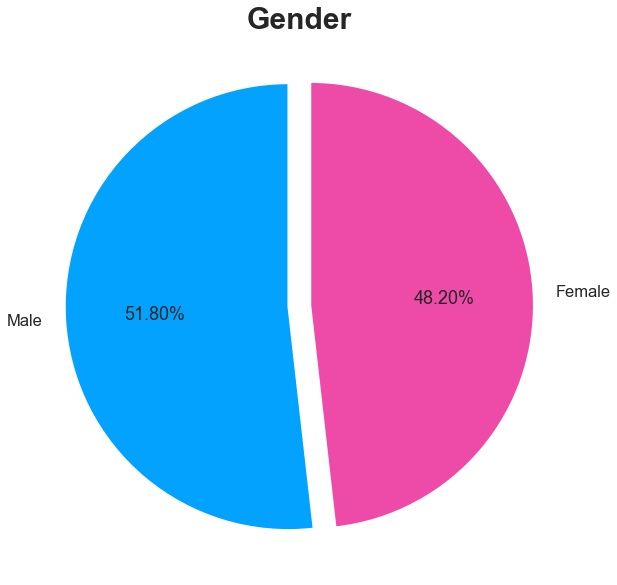

In [307]:
plt.figure(figsize=(10, 10))
plt.axis('equal')
labels = ['Male', 'Female']
plt.pie(df['gender'].value_counts(), labels=labels, explode=[0.05, 0.05],
        autopct='%1.2f%%', colors=['#03a2fe', '#ee4ba8'], startangle=90)
plt.title('Gender', fontsize=30, fontweight='bold')
plt.show()

### Question 8. Use seaborn to draw a bar chart that demonstrates numbers of student each gender distributing on grade with hue based off the "Numbers of student" column

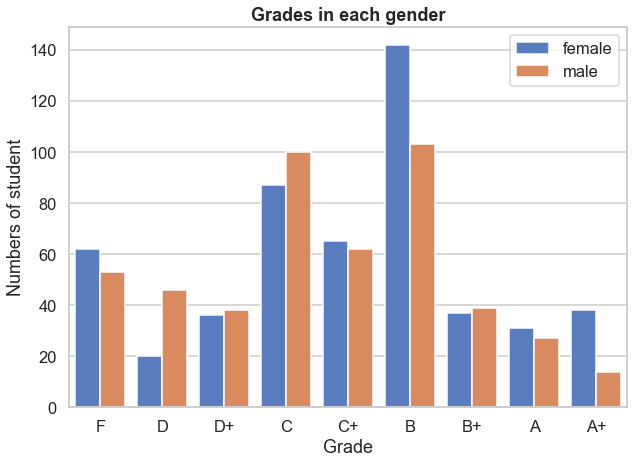

In [308]:
plt.figure(figsize=(10, 7))
sns.set_context("talk", font_scale=1)
sns.set_palette("muted")
axes = sns.countplot(x="grade", hue="gender", data=df, order=[
                     "F", "D", "D+", "C", "C+", "B", "B+", "A", "A+"])
axes.legend(loc='upper right', frameon=True)
axes.set(xlabel='Grade', ylabel='Numbers of student')
plt.title('Grades in each gender', fontsize=18, fontweight='bold')
plt.show()


### Question 9. Draw a pie chart of overall mean score of three subjects

In [309]:
def mean_math(df):
    sum = 0
    count = 0
    for i in range(len(df)):
        sum += df.loc[i, 'math score']
        count += 1
    mean_math = sum / count
    return mean_math


def mean_reading(df):
    sum = 0
    count = 0
    for i in range(len(df)):
        sum += df.loc[i, 'reading score']
        count += 1
    mean_reading = sum / count
    return mean_reading


def mean_writing(df):
    sum = 0
    count = 0
    for i in range(len(df)):
        sum += df.loc[i, 'writing score']
        count += 1
    mean_writing = sum / count
    return mean_writing

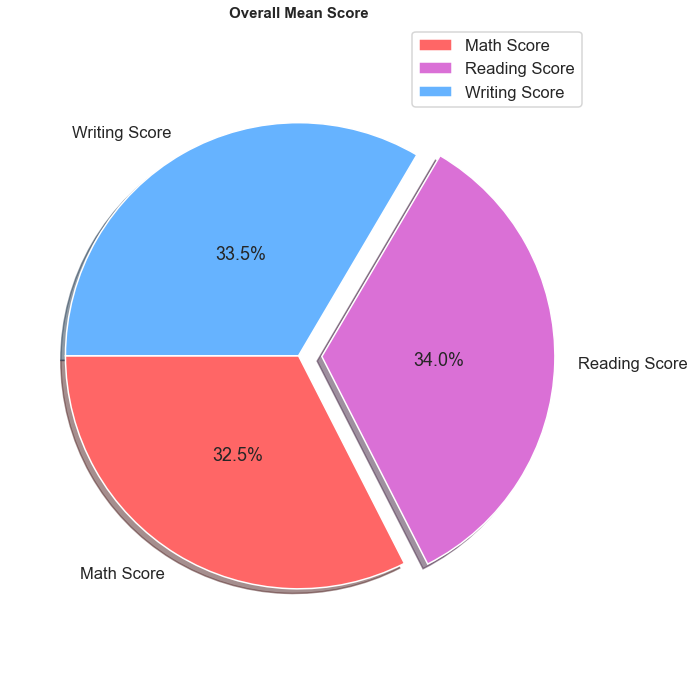

In [310]:
def overall_mean_score():
        plt.figure(figsize=(10, 10))
        plt.axis('equal')
        labels = ['Math Score', 'Reading Score', 'Writing Score']
        colors = ['#ff6666', 'orchid', '#66b3ff']
        explode = [0, 0.1, 0]
        mean_values = [mean_math(df), mean_reading(df),
                mean_writing(df)]

        plt.pie(mean_values, labels=labels, colors=colors, explode=explode,
                autopct='%1.1f%%', shadow=True, startangle=180, pctdistance=0.5)
        plt.legend(['Math Score', 'Reading Score', 'Writing Score'], loc='upper right')
        plt.title(' Overall Mean Score ', fontsize=15, fontweight='bold')
        plt.tight_layout()
        plt.show()

overall_mean_score()

### Question 10. Draw a bar chart to show all parental level of education

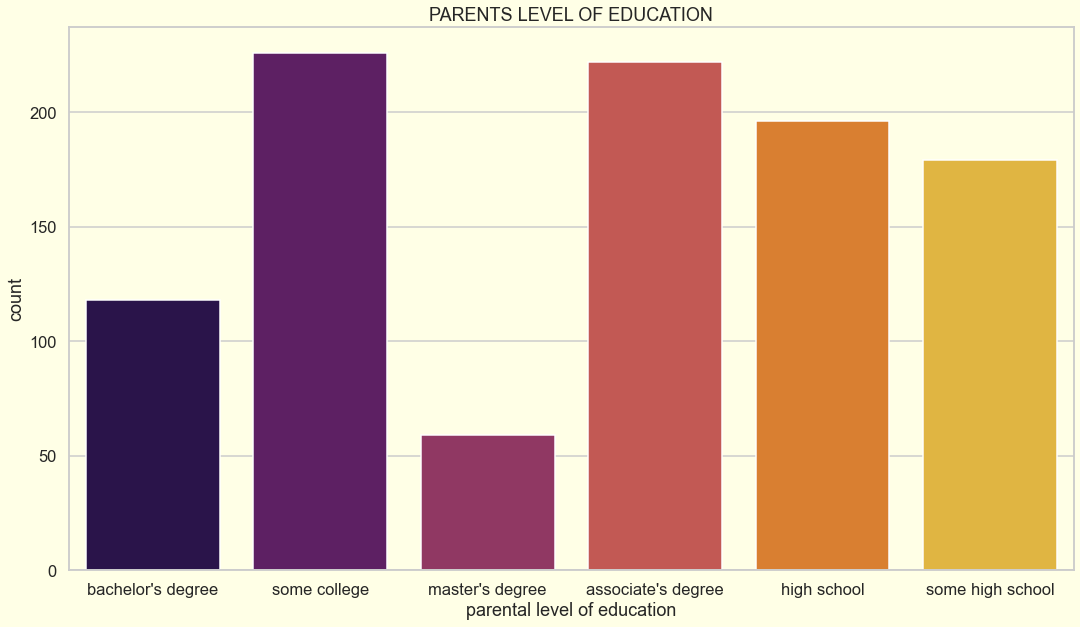

In [311]:
def parents_edu_level():
    plt.rcParams['figure.facecolor'] = "#ffffe6"
    plt.rcParams['axes.facecolor'] = "#ffffe6"
    plt.figure(figsize=(18, 10))
    plt.title('PARENTS LEVEL OF EDUCATION')
    sns.countplot(x='parental level of education', data=df, palette='inferno')
    plt.show()


parents_edu_level()